In [9]:
import pandas as pd
import numpy as np

np.random.seed(42)
n = 1000

df = pd.DataFrame({
    "age": np.random.randint(18, 70, n),
    "job": np.random.choice(
        ["admin", "technician", "services", "management", "retired", "student", "blue-collar"],
        n
    ),
    "marital": np.random.choice(["single", "married", "divorced"], n),
    "education": np.random.choice(["primary", "secondary", "tertiary"], n),
    "balance": np.random.randint(-2000, 50000, n),
    "housing": np.random.choice(["yes", "no"], n),
    "loan": np.random.choice(["yes", "no"], n),
    "contact": np.random.choice(["cellular", "telephone"], n),
})

df["y"] = np.where(
    (df["balance"] > 10000) &
    (df["contact"] == "cellular") &
    (df["housing"] == "no"),
    "yes",
    "no"
)

print(df.head())


   age          job   marital  education  balance housing loan    contact    y
0   56     services  divorced  secondary    32782     yes   no  telephone   no
1   69     services    single   tertiary     -619      no   no   cellular   no
2   46  blue-collar   married    primary     -902      no  yes  telephone   no
3   32        admin  divorced    primary    17810     yes   no  telephone   no
4   60  blue-collar  divorced    primary    22322      no   no   cellular  yes


Train Accuracy: 1.0
Test Accuracy : 1.0

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       160
           1       1.00      1.00      1.00        40

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



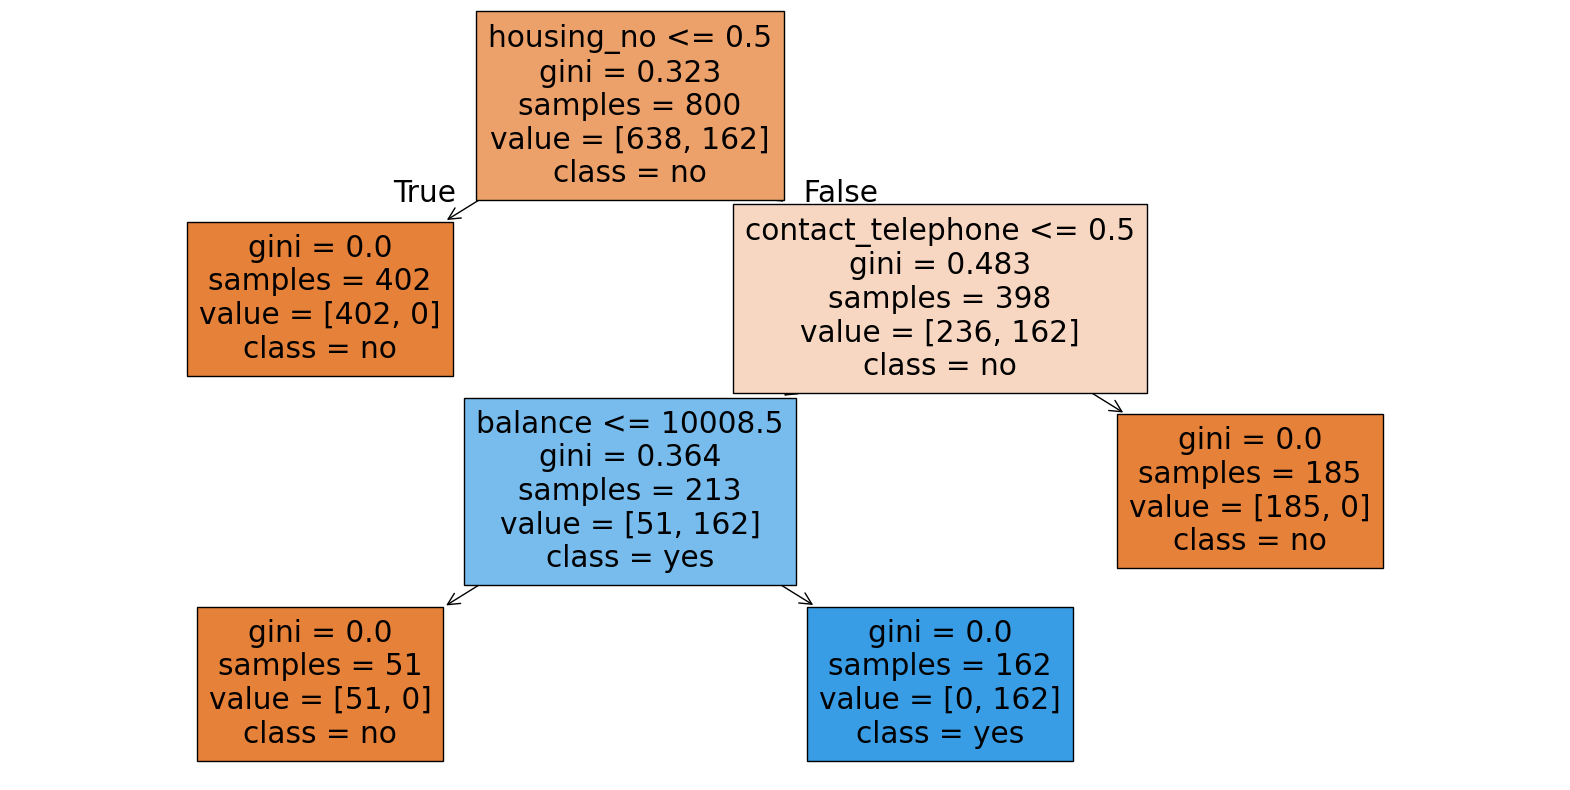

Saved: decision_tree.png


In [10]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report

X = df.drop(columns=["y"])
y_raw = df["y"]

le = LabelEncoder()
y = le.fit_transform(y_raw)

categorical_cols = X.select_dtypes(include="object").columns.tolist()
numerical_cols = X.select_dtypes(exclude="object").columns.tolist()

preprocess = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
    ("num", "passthrough", numerical_cols)
])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

model = DecisionTreeClassifier(
    max_depth=4,
    random_state=42
)

pipe = Pipeline([
    ("prep", preprocess),
    ("model", model)
])

pipe.fit(X_train, y_train)

print("Train Accuracy:", round(accuracy_score(y_train, pipe.predict(X_train)), 4))
print("Test Accuracy :", round(accuracy_score(y_test, pipe.predict(X_test)), 4))

print("\nClassification Report:\n")
print(classification_report(y_test, pipe.predict(X_test)))

feature_names = (
    pipe.named_steps["prep"]
    .named_transformers_["cat"]
    .get_feature_names_out(categorical_cols)
)

all_features = list(feature_names) + numerical_cols

plt.figure(figsize=(20, 10))
plot_tree(
    pipe.named_steps["model"],
    feature_names=all_features,
    class_names=le.classes_,
    filled=True
)
plt.savefig("decision_tree.png", dpi=200)
plt.show()

print("Saved: decision_tree.png")
